In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action='ignore',category=np.VisibleDeprecationWarning)

## Prediction ##

In [31]:
families = Table.read_table('family_heights.csv')
families.group('family').show()

family,count
1,4
10,1
100,3
101,4
102,6
103,7
104,4
105,6
106,7
107,9


In [3]:
parent_avgs = (families.column('father') + families.column('mother'))/2

In [4]:
heights = Table().with_columns(
    'Parent Average', parent_avgs,
    'Child', families.column('child'),
    'Sex', families.column('sex')
)
heights

Parent Average,Child,Sex
72.75,73.2,male
72.75,69.2,female
72.75,69,female
72.75,69,female
71,73.5,male
71,72.5,male
71,65.5,female
71,65.5,female
69.5,71,male
69.5,68,female


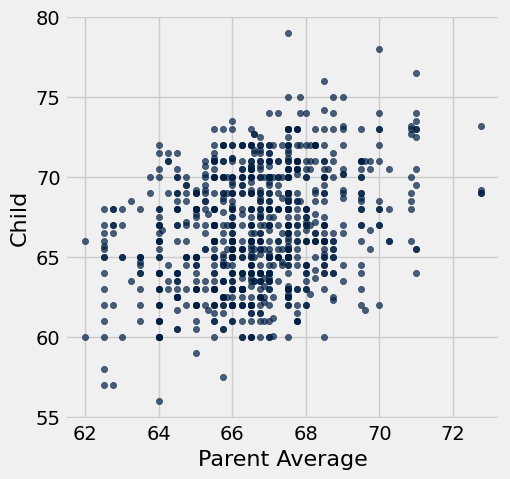

In [5]:
heights.scatter('Parent Average', 'Child')

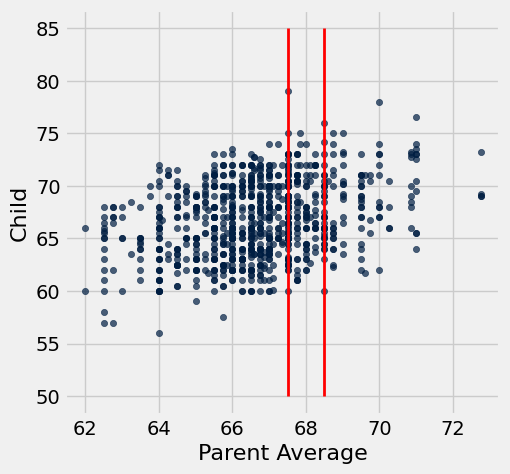

In [6]:
heights.scatter('Parent Average', 'Child')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2);

In [7]:
nearby = heights.where('Parent Average', are.between(67.5, 68.5))
nearby_mean = np.average(nearby.column('Child'))
nearby_mean

67.620000000000005

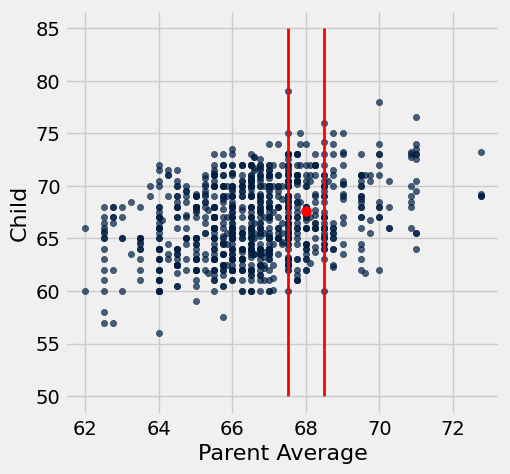

In [8]:
heights.scatter('Parent Average', 'Child')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2)
plots.scatter(68, nearby_mean, color='red', s=50);

In [9]:
def predict(h):
    nearby = heights.where('Parent Average', are.between(h - 1/2, h + 1/2))
    return np.average(nearby.column('Child'))

In [10]:
predict(68)

67.620000000000005

In [11]:
predict(70)

68.561904761904756

In [12]:
predict(73)

70.099999999999994

In [13]:
predicted_heights = heights.apply(predict, 'Parent Average')

In [14]:
heights = heights.with_column('Prediction', predicted_heights)
heights

Parent Average,Child,Sex,Prediction
72.75,73.2,male,70.1
72.75,69.2,female,70.1
72.75,69,female,70.1
72.75,69,female,70.1
71,73.5,male,70.4158
71,72.5,male,70.4158
71,65.5,female,70.4158
71,65.5,female,70.4158
69.5,71,male,68.5025
69.5,68,female,68.5025


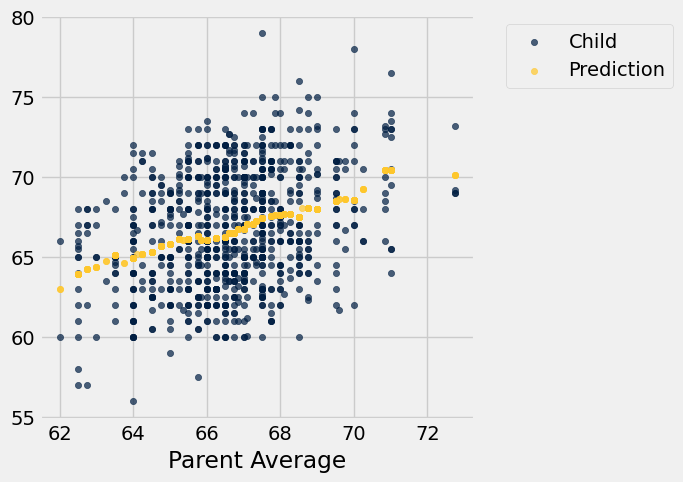

In [15]:
heights.select('Parent Average', 'Child', 'Prediction').scatter('Parent Average')

## Prediction Accuracy ##

In [16]:
def difference(x, y):
    return x - y

In [17]:
pred_errs = heights.apply(difference, 'Prediction', 'Child')
heights = heights.with_column('errors',pred_errs)
heights

Parent Average,Child,Sex,Prediction,errors
72.75,73.2,male,70.1,-3.1
72.75,69.2,female,70.1,0.9
72.75,69,female,70.1,1.1
72.75,69,female,70.1,1.1
71,73.5,male,70.4158,-3.08421
71,72.5,male,70.4158,-2.08421
71,65.5,female,70.4158,4.91579
71,65.5,female,70.4158,4.91579
69.5,71,male,68.5025,-2.4975
69.5,68,female,68.5025,0.5025


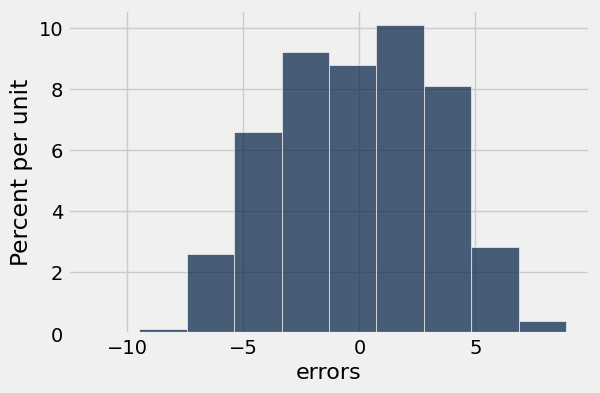

In [18]:
heights.hist('errors')

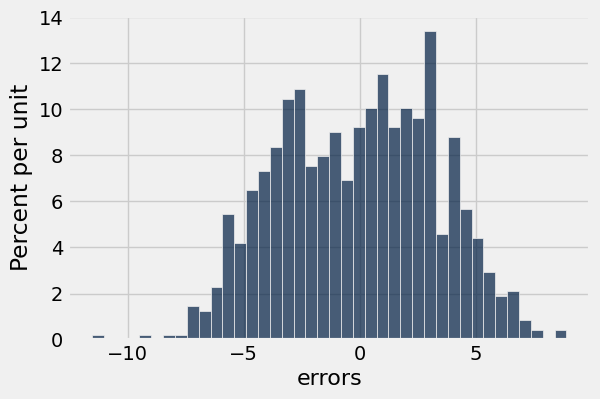

In [19]:
heights.hist('errors', bins=40)

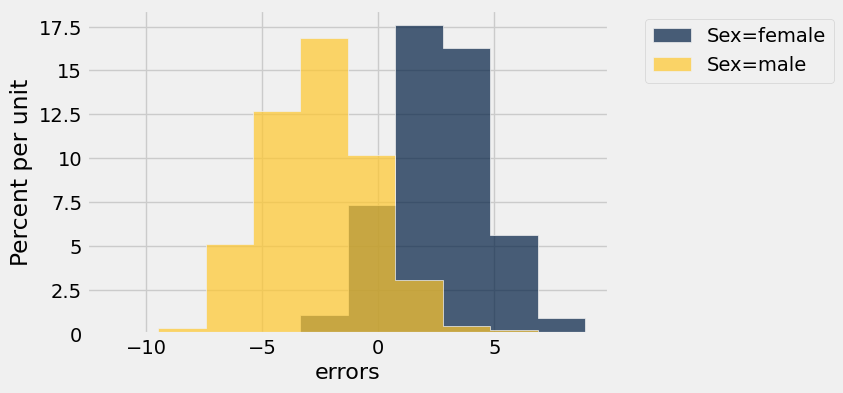

In [20]:
heights.hist('errors', group='Sex')

# Improving the model

In [21]:
def predict_smarter(h, s):
    nearby = heights.where('Parent Average', are.between(h - 1/2, h + 1/2))
    nearby_same_sex = nearby.where('Sex', s)
    return np.average(nearby_same_sex.column('Child'))

In [22]:
predict_smarter(68, 'female')

64.983516483516482

In [23]:
predict_smarter(68, 'male')

70.172340425531914

In [24]:
smarter_predicted_heights = heights.apply(predict_smarter, 'Parent Average', 'Sex')
heights = heights.with_column('Smarter Prediction', smarter_predicted_heights)

In [25]:
smarter_pred_errs = heights.apply(difference, 'Child', 'Smarter Prediction')
heights = heights.with_column('Smarter Errors', smarter_pred_errs)

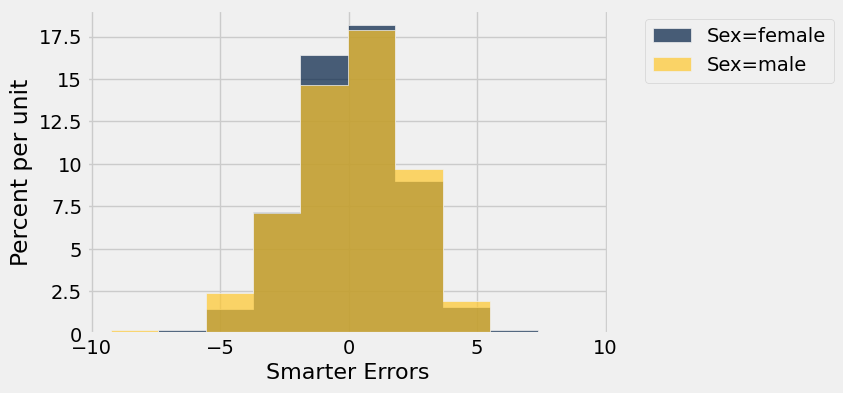

In [26]:
heights.hist('Smarter Errors', group='Sex')

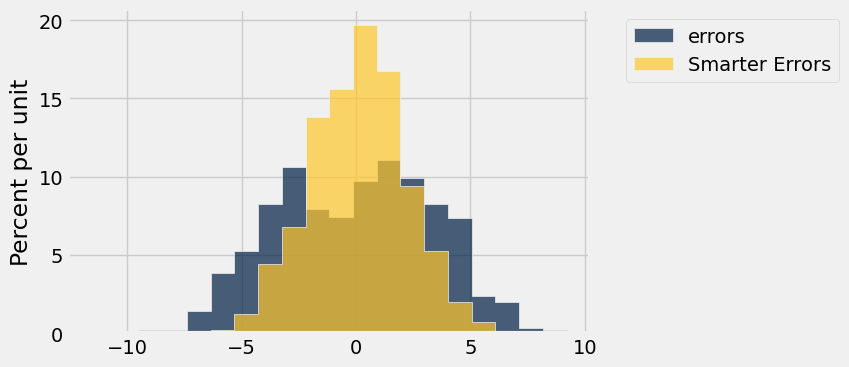

In [27]:
heights.hist('errors', 'Smarter Errors', bins=20)